In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("mental_health_analysis.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User_ID                5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   Social_Media_Hours     5000 non-null   float64
 4   Exercise_Hours         5000 non-null   float64
 5   Sleep_Hours            5000 non-null   float64
 6   Screen_Time_Hours      5000 non-null   float64
 7   Survey_Stress_Score    5000 non-null   int64  
 8   Wearable_Stress_Score  5000 non-null   float64
 9   Support_System         5000 non-null   object 
 10  Academic_Performance   5000 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 429.8+ KB


In [4]:
df.describe()

,User_ID,Age,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,15.493200,4.932081,1.498151,7.057370,7.068630,3.015800,0.496618
std,1443.520003,1.715151,2.853928,0.873984,1.722211,2.883494,1.414762,0.289768
min,1.000000,13.000000,0.000528,0.000473,4.001515,2.000481,1.000000,0.000102
25%,1250.750000,14.000000,2.473150,0.734431,5.611836,4.574327,2.000000,0.244615
50%,2500.500000,16.000000,4.898176,1.483432,7.068874,7.118979,3.000000,0.500404
75%,3750.250000,17.000000,7.369195,2.276089,8.519411,9.526335,4.000000,0.749929
max,5000.000000,18.000000,9.995052,2.999774,9.999229,11.999010,5.000000,0.999812


In [5]:
df.head()

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,F,9.654486,2.458001,5.198926,8.158189,3,0.288962,Moderate,Excellent
1,2,17,M,9.158143,0.392095,8.866097,5.151993,5,0.409446,Moderate,Good
2,3,15,M,5.028755,0.520119,4.943095,9.209325,2,0.423837,Moderate,Poor
3,4,17,F,7.951103,1.022630,5.262773,9.823658,5,0.666021,Moderate,Average
4,5,17,F,1.357459,1.225462,6.196080,11.338990,5,0.928060,High,Poor


In [6]:
df=df.drop(["User_ID"],axis=1)

In [7]:
df.columns

Index(['Age', 'Gender', 'Social_Media_Hours', 'Exercise_Hours', 'Sleep_Hours',
       'Screen_Time_Hours', 'Survey_Stress_Score', 'Wearable_Stress_Score',
       'Support_System', 'Academic_Performance'],
      dtype='object')

In [8]:
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

## FIRST CHECKING THE CORRELATION/INDEPENDENCE OF FEATURE AND IF DATA IS LINEAR OR NOT

In [9]:
numerical_df =df.select_dtypes(include=[np.number])

In [10]:
numerical_df

,Age,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score
0,16,9.654486,2.458001,5.198926,8.158189,3,0.288962
1,17,9.158143,0.392095,8.866097,5.151993,5,0.409446
2,15,5.028755,0.520119,4.943095,9.209325,2,0.423837
3,17,7.951103,1.022630,5.262773,9.823658,5,0.666021
4,17,1.357459,1.225462,6.196080,11.338990,5,0.928060
...,...,...,...,...,...,...,...
4995,14,0.088148,1.003339,8.684888,5.922202,1,0.750205
4996,15,7.161276,1.024644,5.312684,10.224924,4,0.427209
4997,14,3.444383,2.877972,9.227726,4.059322,4,0.002893
4998,18,7.866525,2.395839,4.317831,10.657076,2,0.612063


In [12]:
corre=numerical_df.corr()

In [13]:
corre

,Age,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score
Age,1.000000,-0.004568,0.017528,-0.009405,0.003238,0.013441,0.015578
Social_Media_Hours,-0.004568,1.000000,-0.018806,-0.012947,0.010555,-0.003035,0.019506
Exercise_Hours,0.017528,-0.018806,1.000000,0.019300,-0.008320,0.002489,-0.009297
Sleep_Hours,-0.009405,-0.012947,0.019300,1.000000,-0.002896,0.024097,-0.011803
Screen_Time_Hours,0.003238,0.010555,-0.008320,-0.002896,1.000000,-0.003991,-0.010748
Survey_Stress_Score,0.013441,-0.003035,0.002489,0.024097,-0.003991,1.000000,0.003994
Wearable_Stress_Score,0.015578,0.019506,-0.009297,-0.011803,-0.010748,0.003994,1.000000


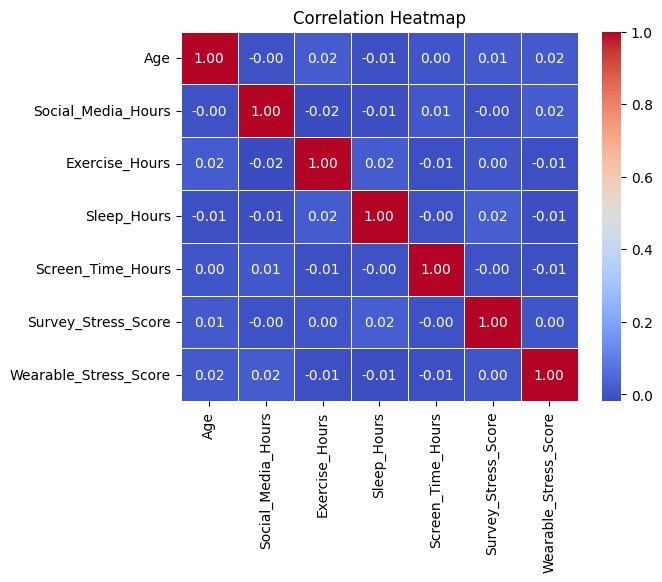

In [17]:
sns.heatmap(corre, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [18]:
#SHEESH not much connection

In [19]:
df

,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,16,F,9.654486,2.458001,5.198926,8.158189,3,0.288962,Moderate,Excellent
1,17,M,9.158143,0.392095,8.866097,5.151993,5,0.409446,Moderate,Good
2,15,M,5.028755,0.520119,4.943095,9.209325,2,0.423837,Moderate,Poor
3,17,F,7.951103,1.022630,5.262773,9.823658,5,0.666021,Moderate,Average
4,17,F,1.357459,1.225462,6.196080,11.338990,5,0.928060,High,Poor
...,...,...,...,...,...,...,...,...,...,...
4995,14,M,0.088148,1.003339,8.684888,5.922202,1,0.750205,Moderate,Average
4996,15,F,7.161276,1.024644,5.312684,10.224924,4,0.427209,Moderate,Excellent
4997,14,M,3.444383,2.877972,9.227726,4.059322,4,0.002893,High,Good
4998,18,F,7.866525,2.395839,4.317831,10.657076,2,0.612063,High,Average


In [24]:
# scaling and encoding the categorical data

In [27]:
non_numerical_df = df.drop(columns=numerical_df.columns)  # Drops numeric columns


In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
non_numerical_df["Gender"]=le.fit_transform(non_numerical_df["Gender"])



In [30]:
non_numerical_df

,Gender,Support_System,Academic_Performance
0,0,Moderate,Excellent
1,1,Moderate,Good
2,1,Moderate,Poor
3,0,Moderate,Average
4,0,High,Poor
...,...,...,...
4995,1,Moderate,Average
4996,0,Moderate,Excellent
4997,1,High,Good
4998,0,High,Average


In [32]:
non_numerical_df["Support_System"].unique()

array(['Moderate', 'High', 'Low'], dtype=object)

In [35]:
from sklearn.preprocessing import OrdinalEncoder
order=[['Low','Moderate','High']]
oe=OrdinalEncoder(categories=order)

non_numerical_df["Support_System"]=oe.fit_transform(non_numerical_df[["Support_System"]])

In [36]:
non_numerical_df

,Gender,Support_System,Academic_Performance
0,0,1.0,Excellent
1,1,1.0,Good
2,1,1.0,Poor
3,0,1.0,Average
4,0,2.0,Poor
...,...,...,...
4995,1,1.0,Average
4996,0,1.0,Excellent
4997,1,2.0,Good
4998,0,2.0,Average


In [37]:
non_numerical_df["Academic_Performance"].unique()

array(['Excellent', 'Good', 'Poor', 'Average'], dtype=object)

In [38]:
order=[['Poor','Average','Good','Excellent']]
oe=OrdinalEncoder(categories=order)

non_numerical_df["Academic_Performance"]=oe.fit_transform(non_numerical_df[["Academic_Performance"]])

In [39]:
non_numerical_df


,Gender,Support_System,Academic_Performance
0,0,1.0,3.0
1,1,1.0,2.0
2,1,1.0,0.0
3,0,1.0,1.0
4,0,2.0,0.0
...,...,...,...
4995,1,1.0,1.0
4996,0,1.0,3.0
4997,1,2.0,2.0
4998,0,2.0,1.0


In [40]:
df_ =pd.concat([numerical_df,non_numerical_df],axis=1)

In [41]:
df_

,Age,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Gender,Support_System,Academic_Performance
0,16,9.654486,2.458001,5.198926,8.158189,3,0.288962,0,1.0,3.0
1,17,9.158143,0.392095,8.866097,5.151993,5,0.409446,1,1.0,2.0
2,15,5.028755,0.520119,4.943095,9.209325,2,0.423837,1,1.0,0.0
3,17,7.951103,1.022630,5.262773,9.823658,5,0.666021,0,1.0,1.0
4,17,1.357459,1.225462,6.196080,11.338990,5,0.928060,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4995,14,0.088148,1.003339,8.684888,5.922202,1,0.750205,1,1.0,1.0
4996,15,7.161276,1.024644,5.312684,10.224924,4,0.427209,0,1.0,3.0
4997,14,3.444383,2.877972,9.227726,4.059322,4,0.002893,1,2.0,2.0
4998,18,7.866525,2.395839,4.317831,10.657076,2,0.612063,0,2.0,1.0


In [51]:
x=df.drop(["Academic_Performance"],axis=1)
y=df["Academic_Performance"]


In [53]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
#removed gender featurex_
x_test=x_test.drop(["Gender"],axis=1)

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [78]:
clf=RandomForestClassifier(
    

    n_estimators=500,  # More trees
    max_depth=20,  # Allow deeper trees
    min_samples_split=5,  # Prevent too small splits
    min_samples_leaf=2,  # Prevent overfitting
    max_features="sqrt",  # Select best feature subset
    random_state=42

)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
print("ACCURACY :",accuracy_score(y_test,y_pred))

ACCURACY : 0.244


In [79]:
print(y_train.value_counts(normalize=True))  # Check class percentages


Academic_Performance
Poor         0.26100
Good         0.25200
Average      0.25125
Excellent    0.23575
Name: proportion, dtype: float64
